**IN THE FOLLOWING SECTION, WE'LL APPLY THE LEARNINGS FROM THE MODULE 4 ASSIGNMENT OF OUR COURSE TO OUR GROUP PROJECT DATASET.**


To start, we'll import all the libraries that we may or may not need to perform our analysis:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

Then we'll import our dataset, and take a look at it:

In [4]:
# Loading the dataset
balance = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
balance.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


A preliminary investigation reveals a few columns that will need to be prepped for our analysis:

- Timestamp is irrevelant for our purposes, and can be dropped altogether.
- Age Range should be cleaned up by converting each range category to a numerical value: Less than 20 = 1, 21 to 35 = 2, 36 to 50 = 3, 51 or more = 4 
- Gender can also be made numerical in the same way, we'll assign 0 = Female, 1 = Male.
- Row 10007 \(index 10005\) contains a date\-formatted entry for the DAILY\_STRESS column.  Since we don't know what that value should actually be, we'll drop the entire row as our sample size is large enough to not be impacted.
- Work\-life balance score is a calculated value, though we don't know how it is calculated.  We'll likely want to extract it so that it doesn't factor into our model's initial training, similar to how the "Region" column was excluded in the Module 4 assignment. We can then use it for testing or training our predictions at a later time.  Similar to Module 4, we'll assign "x" as the dataframe with the variables, and "y" as the dataframe with the actual results. 



In [5]:
# Dropping the Timestamp column
balance = balance.drop(columns=['Timestamp'])

# Replacing Age Ranges in the Age column
balance['AGE'] = balance['AGE'].replace({"Less than 20": 1, "21 to 35": 2, "36 to 50": 3, "51 or more": 4})

# Replacing "Female" with 0 and "Male" with 1 in the Gender column
balance['GENDER'] = balance['GENDER'].replace({"Female": 0, "Male": 1})

# Dropping index row 10005, which contains a non-numeric value
balance = balance.drop(balance.index[10005])

# Assigning x and y as the dataframes for variables and results
x = balance.drop(columns=['WORK_LIFE_BALANCE_SCORE'])
y = balance['WORK_LIFE_BALANCE_SCORE']


# Printing the shape of x and y:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (15971, 22)
Shape of y: (15971,)


The Work\-Life balance score is a calculated field based on the prior entry in that row, but we don't know how that calculation is done.



In [6]:
# Taking a look at x, to confirm everything looks as intended:
x.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER
0,3,2,2,5,0,5,2,0,1,6,...,0,7,5,5,1,4,0,5,3,0
1,2,3,4,3,8,10,5,2,2,5,...,5,8,2,2,2,3,2,6,3,0
2,2,3,3,4,4,10,3,2,2,2,...,5,8,10,2,2,4,8,3,3,0
3,3,3,10,3,10,7,2,5,2,3,...,0,5,7,5,1,5,2,0,4,0
4,5,1,3,3,10,4,2,4,2,5,...,0,7,0,0,2,8,1,5,4,0


Now we can split the data out into Testing and Training sets, still using the strategy from  Assignment 4.1:



In [7]:
# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Printing the shapes of all four arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (11978, 22)
Shape of x_test: (3993, 22)
Shape of y_train: (11978,)
Shape of y_test: (3993,)


We can then standardize them using the Scaler method from Assignment 4.1:


In [8]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the dataframes x_train and x_test
scaler.fit(x_train, x_test)

# Transforming x_train and x_test to apply standardization
x_train_scaled_array = scaler.transform(x_train)
x_test_scaled_array = scaler.transform(x_test)

# Converting the scaled arrays back into dataframes so as to calculate individual means and standard deviations
x_train_scaled = pd.DataFrame(x_train_scaled_array, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled_array, columns=x_test.columns)

# Computing the means and the standard deviations for each column
x_train_column_means = x_train_scaled.mean(axis=0)  
x_train_column_stds = x_train_scaled.std(axis=0)   
x_test_column_means = x_test_scaled.mean(axis=0)  
x_test_column_stds = x_test_scaled.std(axis=0) 

# Printing the means and std devs for each column, rounding to 6 digits
for i, (mean, std) in enumerate(zip(x_train_column_means, x_train_column_stds)):
    print(f"Column {i+1}: Mean = {mean:.6f}, Std Dev = {std:.6f}")

Column 1: Mean = -0.000000, Std Dev = 1.000042
Column 2: Mean = 0.000000, Std Dev = 1.000042
Column 3: Mean = 0.000000, Std Dev = 1.000042
Column 4: Mean = -0.000000, Std Dev = 1.000042
Column 5: Mean = -0.000000, Std Dev = 1.000042
Column 6: Mean = 0.000000, Std Dev = 1.000042
Column 7: Mean = -0.000000, Std Dev = 1.000042
Column 8: Mean = 0.000000, Std Dev = 1.000042
Column 9: Mean = 0.000000, Std Dev = 1.000042
Column 10: Mean = 0.000000, Std Dev = 1.000042
Column 11: Mean = -0.000000, Std Dev = 1.000042
Column 12: Mean = -0.000000, Std Dev = 1.000042
Column 13: Mean = -0.000000, Std Dev = 1.000042
Column 14: Mean = -0.000000, Std Dev = 1.000042
Column 15: Mean = -0.000000, Std Dev = 1.000042
Column 16: Mean = -0.000000, Std Dev = 1.000042
Column 17: Mean = 0.000000, Std Dev = 1.000042
Column 18: Mean = 0.000000, Std Dev = 1.000042
Column 19: Mean = -0.000000, Std Dev = 1.000042
Column 20: Mean = 0.000000, Std Dev = 1.000042
Column 21: Mean = 0.000000, Std Dev = 1.000042
Column 22: 

We have now verified that the means have all been scaled to nearly 0, and the standard deviations have all been scaled to nearly 1.



At this point, we must diverge slightly from the learnings of Assignment 4.1, since our dataset is a regression problem rather than a classification problem.  We can still use the same principles as shown in 4.1, but for this we will first attempt to use a Support Vector Regression rather than a classifier:

In [9]:
# We already have these libraries imported, but since we are using them here for the first itme we'll call them out explicitly again, just for fun: 
from sklearn import svm
from sklearn.metrics import mean_squared_error

# Used Chat Gpt 4.0 mini on 3/18/25 to identify the SMV regressor:
# Creating an SVM regressor and assigning it to clf1
regressor1 = svm.SVR()

# Fitting the SVM regressor with the training data
regressor1.fit(x_train_scaled, y_train)

# Making predictions on the test data
predictions1 = regressor1.predict(x_test_scaled)

# Testing predictions on the test data using mean squared error
mse = mean_squared_error(y_test, predictions1)

# Printing out the results of our prediction
print(mse)

71.81477735555184


**BELOW, ATTEMPTING TO TRAIN A MODEL ON THE DATA USING THE YOUTUBE VIDEO LINKED IN THE MODULE 5 REQUIRED READINGS.**


In [10]:
#Importing the necessary Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

2025-04-02 04:16:46.401221: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-02 04:16:46.403315: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 04:16:46.441225: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-02 04:16:46.442214: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-04-02 04:16:47.894494: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
# Creating a sequential model with 22 dimensions (columns) in input_shape, two hidden layers with 16 and 32 neurons respectively, and an output layer with 1 units

model = Sequential([
    Dense(16, input_shape=(22, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [12]:
# Compiling the model, using Adam as the optimizer with a low learning rate (lr) of.0001, and a loss function of mean_squared_error since its a regression.  We won't print out the result of mean_absolute error used in the youtube video with (metrics=['mean_absolute_error'])

model.compile(Adam(learning_rate=.0001), loss='mean_squared_error')

In [13]:
# Training the model by calling fit. "Batch_size" is how many pieces of data we want sent to the model at once, epochs=20 is how many times the data should run through the model. Shuffle=True shuffles the data each time it runs through an epoch, verbose=2 determines how much output we want to see.

model.fit(x_train_scaled, y_train, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20


1198/1198 - 2s - loss: 436899.6250 - 2s/epoch - 2ms/step


Epoch 2/20


1198/1198 - 2s - loss: 389001.9375 - 2s/epoch - 1ms/step


Epoch 3/20


1198/1198 - 2s - loss: 284908.7812 - 2s/epoch - 1ms/step


Epoch 4/20


1198/1198 - 2s - loss: 165048.5938 - 2s/epoch - 1ms/step


Epoch 5/20


1198/1198 - 2s - loss: 85602.3281 - 2s/epoch - 1ms/step


Epoch 6/20


1198/1198 - 2s - loss: 55069.6289 - 2s/epoch - 2ms/step


Epoch 7/20


1198/1198 - 2s - loss: 41953.0508 - 2s/epoch - 1ms/step


Epoch 8/20


1198/1198 - 2s - loss: 32119.5000 - 2s/epoch - 1ms/step


Epoch 9/20


1198/1198 - 2s - loss: 24085.5566 - 2s/epoch - 2ms/step


Epoch 10/20


1198/1198 - 2s - loss: 17838.9531 - 2s/epoch - 1ms/step


Epoch 11/20


1198/1198 - 2s - loss: 13165.3047 - 2s/epoch - 1ms/step


Epoch 12/20


1198/1198 - 2s - loss: 9801.9893 - 2s/epoch - 1ms/step


Epoch 13/20


1198/1198 - 2s - loss: 7494.1748 - 2s/epoch - 1ms/step


Epoch 14/20


1198/1198 - 2s - loss: 5906.0303 - 2s/epoch - 2ms/step


Epoch 15/20


1198/1198 - 2s - loss: 4804.7769 - 2s/epoch - 2ms/step


Epoch 16/20


1198/1198 - 2s - loss: 4009.2766 - 2s/epoch - 2ms/step


Epoch 17/20


1198/1198 - 2s - loss: 3408.0798 - 2s/epoch - 2ms/step


Epoch 18/20


1198/1198 - 2s - loss: 2940.9263 - 2s/epoch - 2ms/step


Epoch 19/20


1198/1198 - 2s - loss: 2560.2502 - 2s/epoch - 2ms/step


Epoch 20/20


1198/1198 - 2s - loss: 2242.2734 - 2s/epoch - 2ms/step


Note: If we increase the number of epochs, the mean absolute error keeps decreasing.  By Epoch 60 approximately we reach a mean absolute error of 2, which could indicate over-fitting.

To identify if we're over-fitting, let's visualize our results.


  1/125 [..............................] - ETA: 10s

 57/125 [============>.................] - ETA: 0s 

 89/125 [====================>.........] - ETA: 0s

125/125 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Predicted vs. Actual Values')

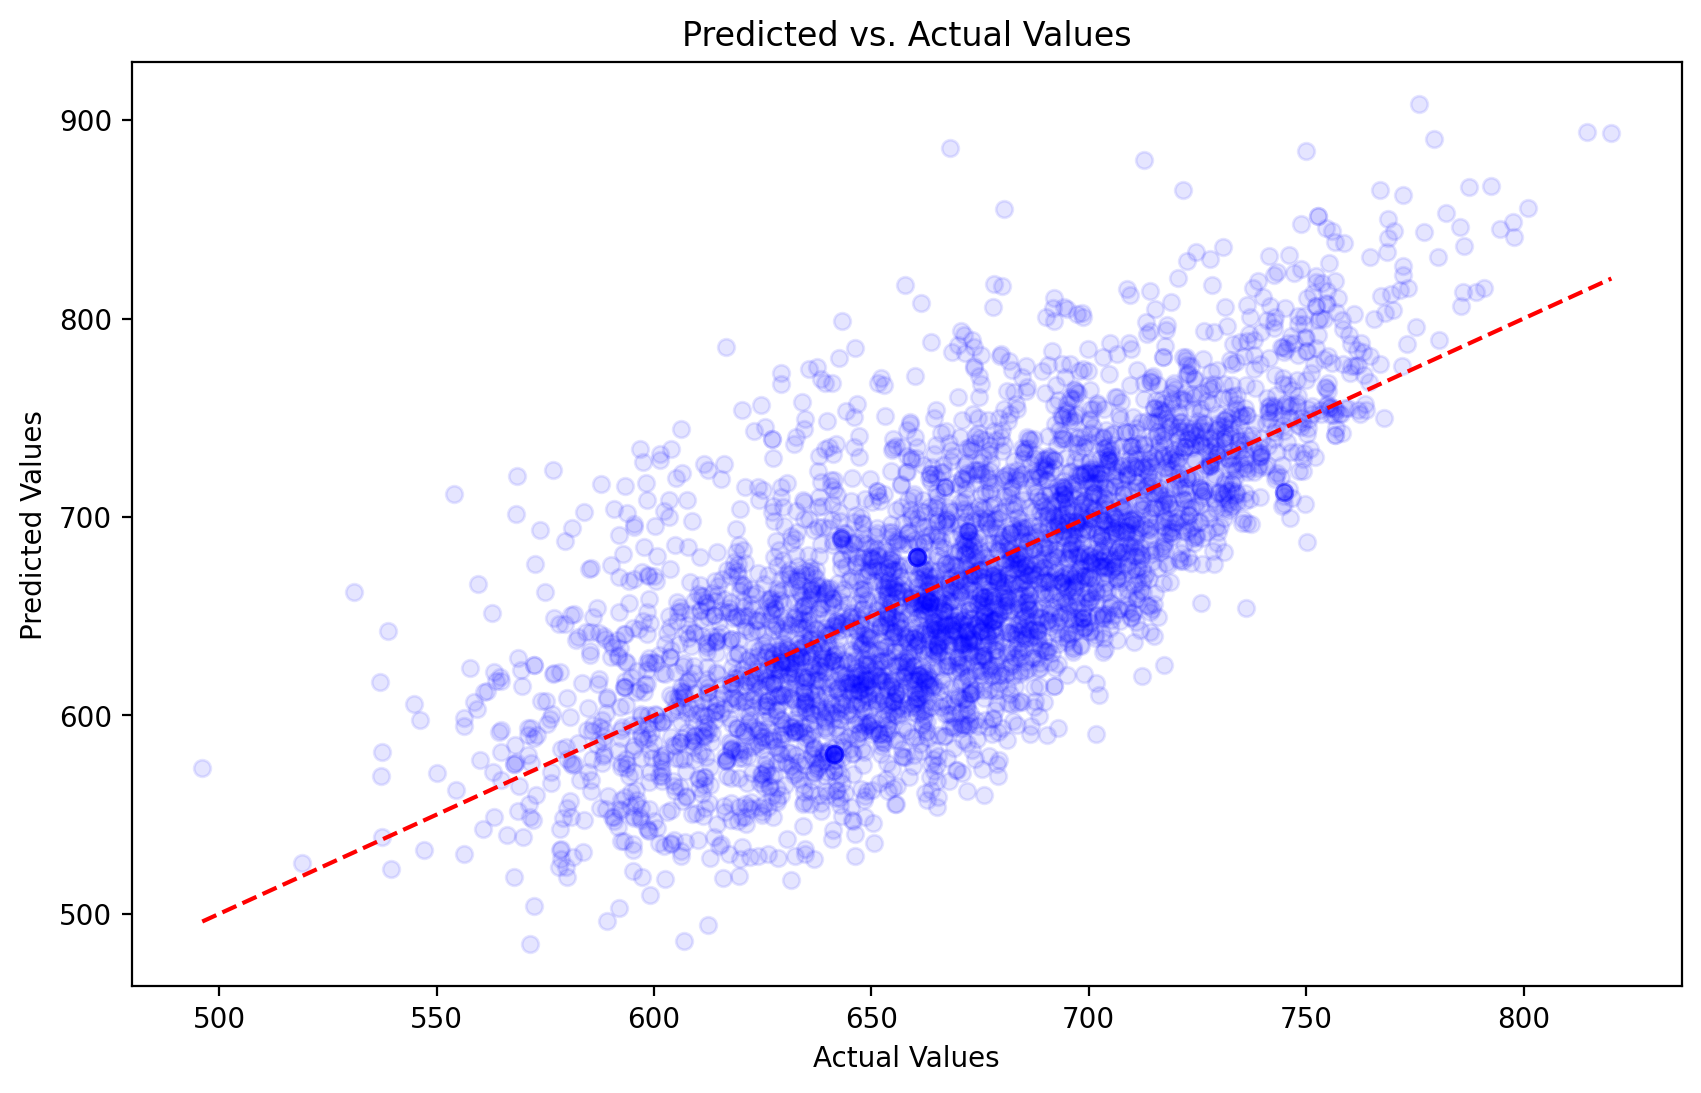

In [14]:
# Creating predictions_2 so we can call it to visualize results
predictions_2 = model.predict(x_test_scaled)

# Setting up a scatter plot. The perfect prediction line represents the ground truth of y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_2, color='blue', alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

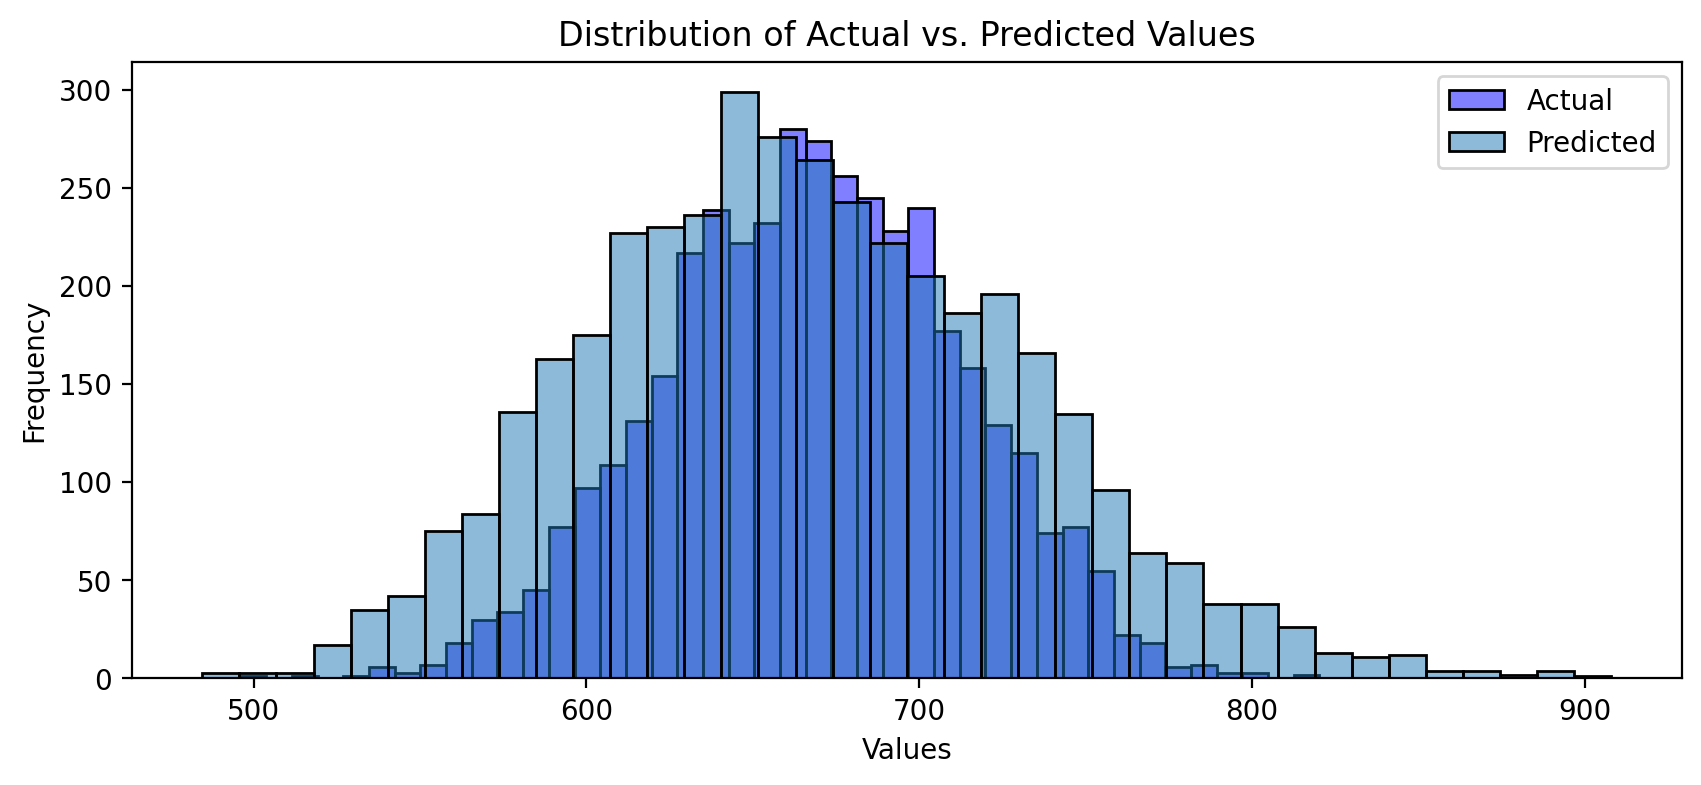

In [15]:
# Also mapping out a histogram, to better visualize actual vs predicted:
plt.figure(figsize=(10, 4))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual')
sns.histplot(predictions_2, color='red', alpha=0.5, label='Predicted',)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()

So that's pretty and all, but it doesn't actual show if I'm overfitting the data.  Let's try a different approach...


At this point, looked at the scatterplot, I realized a new possibility:

Even though we don't know the formula used to create the work\-life balance score, it is likely to be a weighted aggregate of the previous cells \- which would thus likely be a linear function.  

If that were true it would be impossible to overfit: even though this is a regression problem, a full convergence should be possible in which the model learns and converges on the actual formula used. 

All that is needed is to run enough epochs until the mean squared errors reaches zero, and stays there.

Time to run though some additional epochs!


In [16]:
# Running 100 additional epochs, but also saving the history so that we can then plot it out to identify if we are overfitting (which would should throught the Loss / MSE increasing) 
history = model.fit(x_train_scaled, y_train, batch_size=10, epochs=100, shuffle=True, verbose=2)

Epoch 1/100


1198/1198 - 2s - loss: 1971.9672 - 2s/epoch - 2ms/step


Epoch 2/100


1198/1198 - 2s - loss: 1741.1775 - 2s/epoch - 2ms/step


Epoch 3/100


1198/1198 - 2s - loss: 1543.2030 - 2s/epoch - 2ms/step


Epoch 4/100


1198/1198 - 2s - loss: 1370.5197 - 2s/epoch - 2ms/step


Epoch 5/100


1198/1198 - 2s - loss: 1217.9886 - 2s/epoch - 2ms/step


Epoch 6/100


1198/1198 - 2s - loss: 1082.6038 - 2s/epoch - 2ms/step


Epoch 7/100


1198/1198 - 2s - loss: 964.3983 - 2s/epoch - 2ms/step


Epoch 8/100


1198/1198 - 2s - loss: 858.6345 - 2s/epoch - 1ms/step


Epoch 9/100


1198/1198 - 2s - loss: 766.0402 - 2s/epoch - 2ms/step


Epoch 10/100


1198/1198 - 2s - loss: 684.9525 - 2s/epoch - 2ms/step


Epoch 11/100


1198/1198 - 2s - loss: 612.3526 - 2s/epoch - 2ms/step


Epoch 12/100


1198/1198 - 2s - loss: 547.2942 - 2s/epoch - 1ms/step


Epoch 13/100


1198/1198 - 2s - loss: 489.8784 - 2s/epoch - 1ms/step


Epoch 14/100


1198/1198 - 2s - loss: 438.3740 - 2s/epoch - 2ms/step


Epoch 15/100


1198/1198 - 2s - loss: 392.8083 - 2s/epoch - 1ms/step


Epoch 16/100


1198/1198 - 2s - loss: 351.5620 - 2s/epoch - 1ms/step


Epoch 17/100


1198/1198 - 2s - loss: 313.5100 - 2s/epoch - 2ms/step


Epoch 18/100


1198/1198 - 2s - loss: 279.8333 - 2s/epoch - 1ms/step


Epoch 19/100


1198/1198 - 2s - loss: 249.3577 - 2s/epoch - 2ms/step


Epoch 20/100


1198/1198 - 2s - loss: 222.0478 - 2s/epoch - 2ms/step


Epoch 21/100


1198/1198 - 2s - loss: 198.3763 - 2s/epoch - 2ms/step


Epoch 22/100


1198/1198 - 2s - loss: 176.6831 - 2s/epoch - 2ms/step


Epoch 23/100


1198/1198 - 2s - loss: 157.4307 - 2s/epoch - 1ms/step


Epoch 24/100


1198/1198 - 2s - loss: 139.6484 - 2s/epoch - 2ms/step


Epoch 25/100


1198/1198 - 2s - loss: 124.0134 - 2s/epoch - 2ms/step


Epoch 26/100


1198/1198 - 2s - loss: 110.0184 - 2s/epoch - 2ms/step


Epoch 27/100


1198/1198 - 2s - loss: 97.3495 - 2s/epoch - 2ms/step


Epoch 28/100


1198/1198 - 2s - loss: 86.0707 - 2s/epoch - 2ms/step


Epoch 29/100


1198/1198 - 2s - loss: 76.4967 - 2s/epoch - 2ms/step


Epoch 30/100


1198/1198 - 2s - loss: 67.5988 - 2s/epoch - 2ms/step


Epoch 31/100


1198/1198 - 2s - loss: 59.7275 - 2s/epoch - 2ms/step


Epoch 32/100


1198/1198 - 2s - loss: 52.6560 - 2s/epoch - 2ms/step


Epoch 33/100


1198/1198 - 2s - loss: 46.4561 - 2s/epoch - 2ms/step


Epoch 34/100


1198/1198 - 2s - loss: 40.6947 - 2s/epoch - 2ms/step


Epoch 35/100


1198/1198 - 2s - loss: 35.4795 - 2s/epoch - 1ms/step


Epoch 36/100


1198/1198 - 2s - loss: 30.9375 - 2s/epoch - 1ms/step


Epoch 37/100


1198/1198 - 2s - loss: 26.8218 - 2s/epoch - 2ms/step


Epoch 38/100


1198/1198 - 2s - loss: 23.2050 - 2s/epoch - 2ms/step


Epoch 39/100


1198/1198 - 2s - loss: 20.0448 - 2s/epoch - 1ms/step


Epoch 40/100


1198/1198 - 2s - loss: 17.1166 - 2s/epoch - 1ms/step


Epoch 41/100


1198/1198 - 2s - loss: 14.5876 - 2s/epoch - 2ms/step


Epoch 42/100


1198/1198 - 2s - loss: 12.3391 - 2s/epoch - 1ms/step


Epoch 43/100


1198/1198 - 2s - loss: 10.4908 - 2s/epoch - 2ms/step


Epoch 44/100


1198/1198 - 2s - loss: 8.8569 - 2s/epoch - 2ms/step


Epoch 45/100


1198/1198 - 2s - loss: 7.4597 - 2s/epoch - 1ms/step


Epoch 46/100


1198/1198 - 2s - loss: 6.2856 - 2s/epoch - 2ms/step


Epoch 47/100


1198/1198 - 2s - loss: 5.2879 - 2s/epoch - 2ms/step


Epoch 48/100


1198/1198 - 2s - loss: 4.4946 - 2s/epoch - 1ms/step


Epoch 49/100


1198/1198 - 2s - loss: 3.7800 - 2s/epoch - 1ms/step


Epoch 50/100


1198/1198 - 2s - loss: 3.2247 - 2s/epoch - 1ms/step


Epoch 51/100


1198/1198 - 2s - loss: 2.7514 - 2s/epoch - 2ms/step


Epoch 52/100


1198/1198 - 2s - loss: 2.3236 - 2s/epoch - 2ms/step


Epoch 53/100


1198/1198 - 2s - loss: 2.0231 - 2s/epoch - 2ms/step


Epoch 54/100


1198/1198 - 2s - loss: 1.7414 - 2s/epoch - 2ms/step


Epoch 55/100


1198/1198 - 2s - loss: 1.5000 - 2s/epoch - 2ms/step


Epoch 56/100


1198/1198 - 2s - loss: 1.3103 - 2s/epoch - 2ms/step


Epoch 57/100


1198/1198 - 2s - loss: 1.1490 - 2s/epoch - 2ms/step


Epoch 58/100


1198/1198 - 2s - loss: 1.0119 - 2s/epoch - 2ms/step


Epoch 59/100


1198/1198 - 2s - loss: 0.8783 - 2s/epoch - 2ms/step


Epoch 60/100


1198/1198 - 2s - loss: 0.7700 - 2s/epoch - 2ms/step


Epoch 61/100


1198/1198 - 2s - loss: 0.6788 - 2s/epoch - 2ms/step


Epoch 62/100


1198/1198 - 2s - loss: 0.6053 - 2s/epoch - 2ms/step


Epoch 63/100


1198/1198 - 2s - loss: 0.5336 - 2s/epoch - 2ms/step


Epoch 64/100


1198/1198 - 2s - loss: 0.4730 - 2s/epoch - 1ms/step


Epoch 65/100


1198/1198 - 2s - loss: 0.4309 - 2s/epoch - 2ms/step


Epoch 66/100


1198/1198 - 2s - loss: 0.3695 - 2s/epoch - 2ms/step


Epoch 67/100


1198/1198 - 2s - loss: 0.3365 - 2s/epoch - 2ms/step


Epoch 68/100


1198/1198 - 2s - loss: 0.3022 - 2s/epoch - 2ms/step


Epoch 69/100


1198/1198 - 2s - loss: 0.2602 - 2s/epoch - 2ms/step


Epoch 70/100


1198/1198 - 2s - loss: 0.2361 - 2s/epoch - 2ms/step


Epoch 71/100


1198/1198 - 2s - loss: 0.2060 - 2s/epoch - 2ms/step


Epoch 72/100


1198/1198 - 2s - loss: 0.1880 - 2s/epoch - 2ms/step


Epoch 73/100


1198/1198 - 2s - loss: 0.1619 - 2s/epoch - 2ms/step


Epoch 74/100


1198/1198 - 2s - loss: 0.1426 - 2s/epoch - 2ms/step


Epoch 75/100


1198/1198 - 2s - loss: 0.1252 - 2s/epoch - 2ms/step


Epoch 76/100


1198/1198 - 2s - loss: 0.1163 - 2s/epoch - 2ms/step


Epoch 77/100


1198/1198 - 2s - loss: 0.0967 - 2s/epoch - 1ms/step


Epoch 78/100


1198/1198 - 2s - loss: 0.0855 - 2s/epoch - 2ms/step


Epoch 79/100


1198/1198 - 2s - loss: 0.0791 - 2s/epoch - 2ms/step


Epoch 80/100


1198/1198 - 2s - loss: 0.0641 - 2s/epoch - 2ms/step


Epoch 81/100


1198/1198 - 2s - loss: 0.0633 - 2s/epoch - 2ms/step


Epoch 82/100


1198/1198 - 2s - loss: 0.0480 - 2s/epoch - 1ms/step


Epoch 83/100


1198/1198 - 2s - loss: 0.0460 - 2s/epoch - 2ms/step


Epoch 84/100


1198/1198 - 2s - loss: 0.0407 - 2s/epoch - 2ms/step


Epoch 85/100


1198/1198 - 2s - loss: 0.0343 - 2s/epoch - 2ms/step


Epoch 86/100


1198/1198 - 2s - loss: 0.0286 - 2s/epoch - 2ms/step


Epoch 87/100


1198/1198 - 2s - loss: 0.0263 - 2s/epoch - 1ms/step


Epoch 88/100


1198/1198 - 2s - loss: 0.0241 - 2s/epoch - 2ms/step


Epoch 89/100


1198/1198 - 2s - loss: 0.0193 - 2s/epoch - 1ms/step


Epoch 90/100


1198/1198 - 2s - loss: 0.0177 - 2s/epoch - 2ms/step


Epoch 91/100


1198/1198 - 2s - loss: 0.0161 - 2s/epoch - 2ms/step


Epoch 92/100


1198/1198 - 2s - loss: 0.0150 - 2s/epoch - 2ms/step


Epoch 93/100


1198/1198 - 2s - loss: 0.0140 - 2s/epoch - 2ms/step


Epoch 94/100


1198/1198 - 2s - loss: 0.0142 - 2s/epoch - 2ms/step


Epoch 95/100


1198/1198 - 2s - loss: 0.0122 - 2s/epoch - 2ms/step


Epoch 96/100


1198/1198 - 2s - loss: 0.0101 - 2s/epoch - 1ms/step


Epoch 97/100


1198/1198 - 2s - loss: 0.0102 - 2s/epoch - 1ms/step


Epoch 98/100


1198/1198 - 2s - loss: 0.0115 - 2s/epoch - 1ms/step


Epoch 99/100


1198/1198 - 2s - loss: 0.0078 - 2s/epoch - 2ms/step


Epoch 100/100


1198/1198 - 2s - loss: 0.0101 - 2s/epoch - 2ms/step


Now, running the scatterplot again should show simply a straight line:


  1/125 [..............................] - ETA: 1s

 30/125 [======>.......................] - ETA: 0s

 77/125 [=================>............] - ETA: 0s

110/125 [=========================>....] - ETA: 0s

125/125 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Predicted vs. Actual Values')

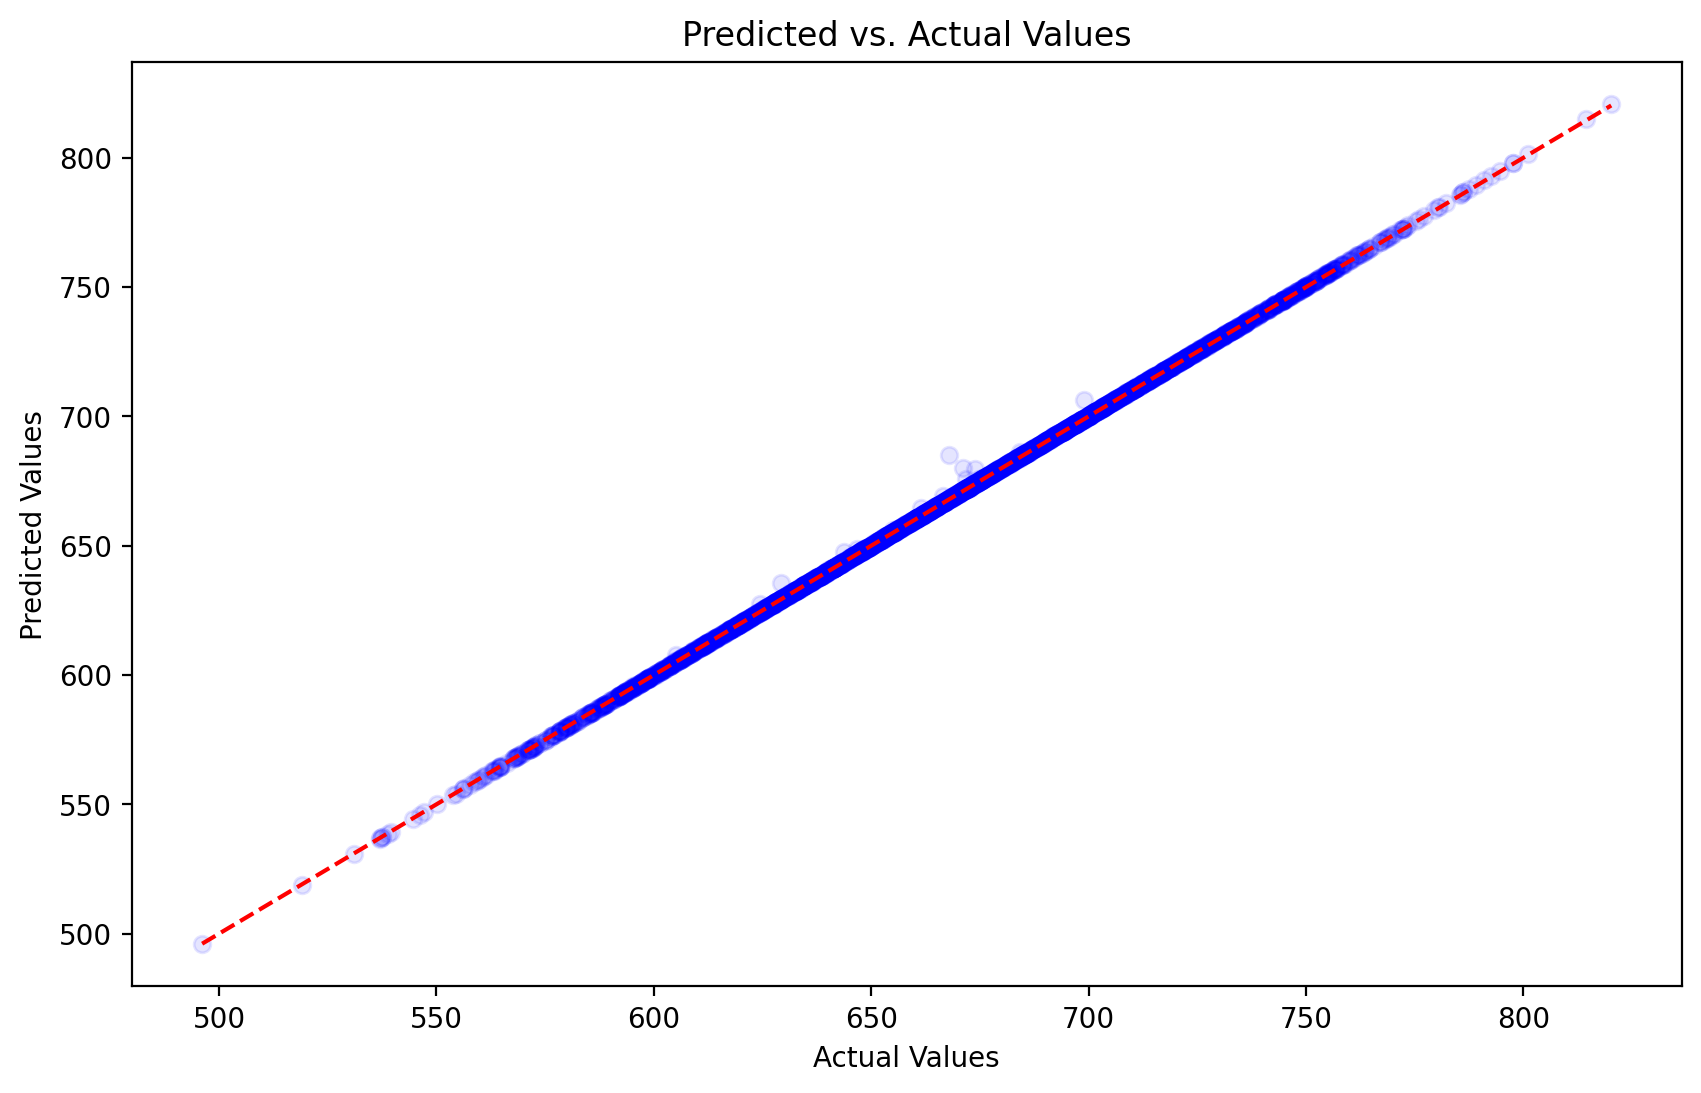

In [17]:
# Creating predictions_3 so we can call it to visualize results
predictions_3 = model.predict(x_test_scaled)

# Setting up a scatter plot. The perfect prediction line represents the ground truth of y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_3, color='blue', alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

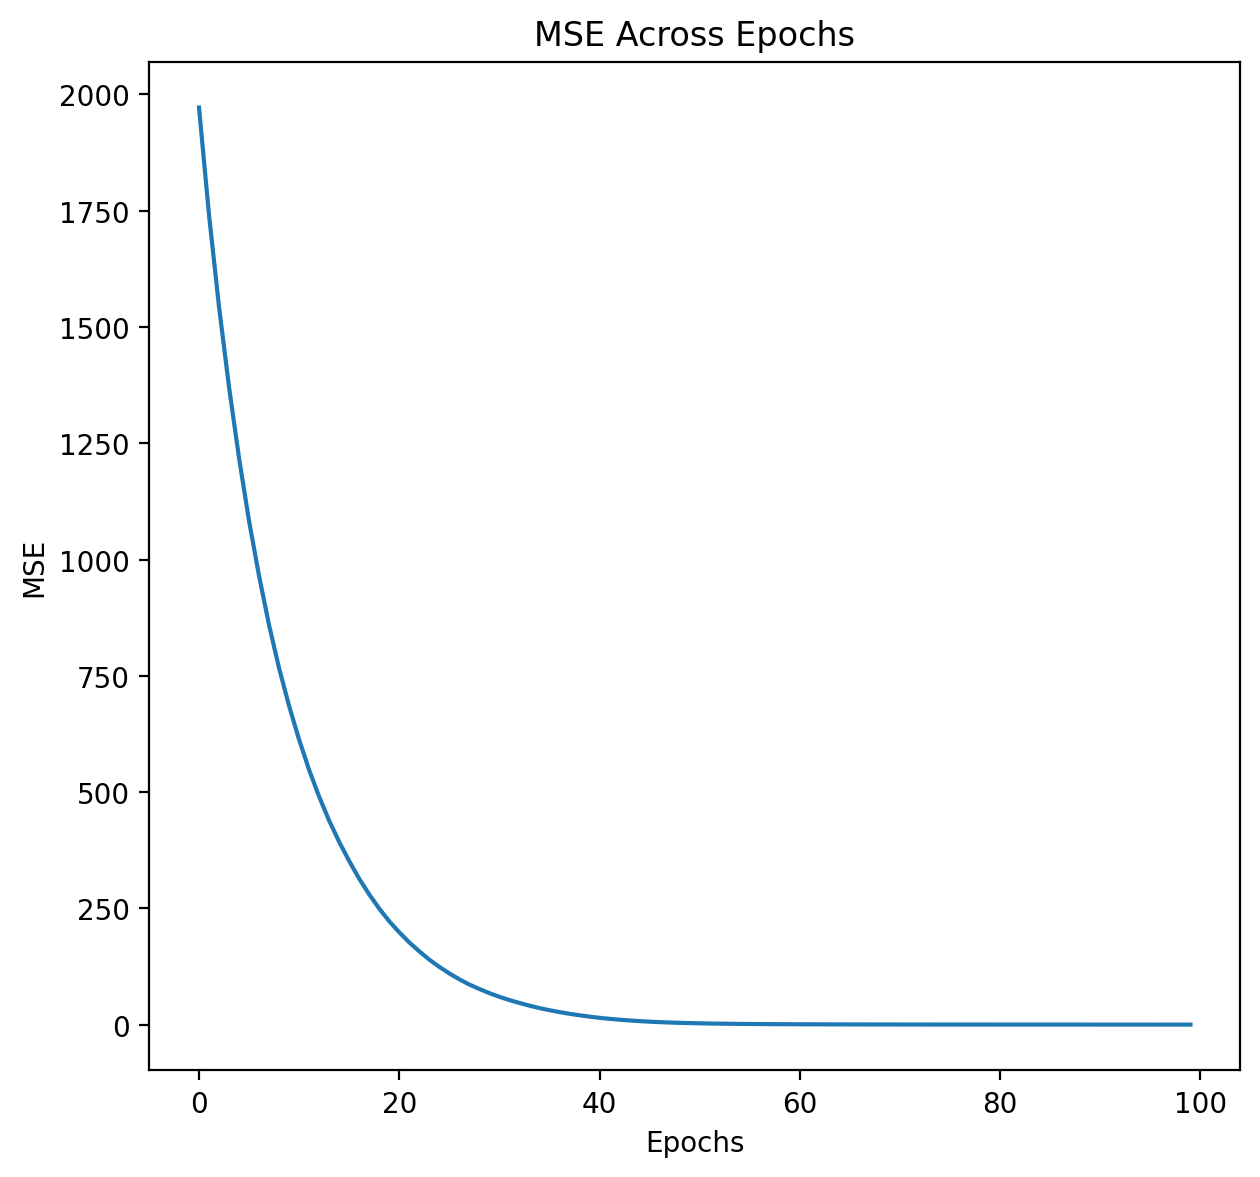

In [18]:
# Accessing the history dictionary
history_dict = history.history

# Plotting this puppy out
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='MSE')
plt.title('MSE Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')

# Annnnd showing the plot
plt.tight_layout()
plt.show()

We could keep going, but this is close enough for our purposes.

The MSE values stay quite close to zero \- meaning we've either gotten really close to a convergence of our weights, or we've overfit to the point where our model has memorized almost every predictable combination of values.  I'm not sure how to distinguish between the two, but for our purposes either outcome works: the model can reliably predict an accurate score for any combination of values entered.

We reached the current state through 120 epochs, and there is a chance we could achieve a better result faster with a different neural network, by increasing the number or width of layers.  That said, the current solution is sufficient for now.

Next up: let's see if we can put this into an app in the two weeks remaining before the project is due, and achieve the stated goal of our initial problem statement!



**NOTE: ALL CODE BELOW IS BONUS WORK DONE TO ACTUALLY PUT THE TRAINED MODEL TO USE.**

**IT IS NOT PART OF THE CORE ASSIGNMENT OF TRAINING A MODEL.**

**AS SUCH, 100% OF IT WAS GENERATED BY CLAUDE 3.7 ON 3/30.**

**THE CODE ITSELF IS NOT MEANT TO BE REVIEWED.**  

**HOWEVER, AFTER RUNNING ALL THE CELLS, THE FINAL CELL WILL ENABLE THE USER TO ENTER THEIR LIFESTYLE PARAMETERS AND OBTAIN A SCORE FROM THE AI MODEL.**

**IT WILL ALSO GENERATE A LIFESTYLE CHANGE RECOMMENDATION FOR HOW TO IMPROVE YOUR SCORE... HOPEFULLY YOU ENJOY THIS ADDED BONUS.**


In [19]:
# Get the column names from your training data
feature_columns = x_train_scaled.columns  

# If x_train is a numpy array, you need to know the feature names
# print("Features needed:", feature_columns)

In [20]:
# Get the column names from your training data
feature_columns = x_train_scaled.columns  

def collect_user_input():
    """Collect input for each feature from the user."""
    # Define the feature names
    feature_names = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 
                     'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 
                     'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 
                     'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 
                     'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER']
    
    user_data = {}
    
    print("\n--- Please enter values for the following features ---")
    print("(Enter a numeric value for each prompt)")
    
    # For each feature, provide some guidance and collect input
    feature_descriptions = {
        'FRUITS_VEGGIES': 'Number of fruits and vegetables consumed daily (on a scale of 0-5): ',
        'DAILY_STRESS': 'Daily stress level (0-5, where 0=none, 5=extreme): ',
        'PLACES_VISITED': 'Number of new places visited in the last year (use 10 as the max value): ',
        'CORE_CIRCLE': 'Number of people in your core social circle (use 10 as the max value): ',
        'SUPPORTING_OTHERS': 'Hours spent supporting others weekly (use 10 as the max value): ',
        'SOCIAL_NETWORK': 'Size of your social network (use 10 as the max value): ',
        'ACHIEVEMENT': 'Achievement level (0-5, where 0=none, 5=very high): ',
        'DONATION': 'Percentage of income donated to charity (on a scale of 0-5): ',
        'BMI_RANGE': 'BMI range (1=normal, 2=overweight): ',
        'TODO_COMPLETED': 'Items on daily to-do list completed (use 10 as the max value): ',
        'FLOW': 'Hours spent in "flow" state weekly (use 10 as the max value): ',
        'DAILY_STEPS': 'Average daily steps, on a scale of 1-10: ',
        'LIVE_VISION': 'Clarity of life vision (0-10, where 0=none, 10=very clear): ',
        'SLEEP_HOURS': 'Average sleep hours per night: ',
        'LOST_VACATION': 'Vacation days lost/not used last year (on a scale of 0-10): ',
        'DAILY_SHOUTING': 'Days per week with shouting incidents (on a scale of 0-10): ',
        'SUFFICIENT_INCOME': 'Income sufficiency (1=insufficient, 2=sufficient): ',
        'PERSONAL_AWARDS': 'Number of personal awards received in the last year. Use 10 as the max value: ',
        'TIME_FOR_PASSION': 'Time spent on passion projects (on a scale of 1-10): ',
        'WEEKLY_MEDITATION': 'Amount of meditation per week (on a scale of 1-10): ',
        'AGE': 'Your age (Less than 20 = 1, 21 to 35 = 2, 36 to 50 = 3, 51 or more = 4 ): ',
        'GENDER': 'Gender (0=female, 1=male): '
    }
    
    for feature in feature_names:
        while True:
            try:
                # Use the description if available, otherwise use the feature name
                prompt = feature_descriptions.get(feature, f"{feature}: ")
                value = float(input(prompt))
                user_data[feature] = value
                break
            except ValueError:
                print("Please enter a numeric value.")
    
    return user_data, feature_names

In [21]:
def prepare_user_input(user_data, feature_names, scaler):
    """Convert user input to the format expected by the model."""
    # Create a DataFrame with the same structure as training data
    user_df = pd.DataFrame([user_data])
    
    # Make sure columns are in the same order as training data
    user_df = user_df[feature_names]
    
    # Scale the features using the same scaler used for training data
    user_scaled = scaler.transform(user_df)
    
    return user_scaled

In [22]:
def predict_for_user_input(model, user_scaled):
    """Use the model to make predictions on user input."""
    prediction = model.predict(user_scaled)
    return prediction[0][0]  # Assuming prediction shape is (1,1)

In [31]:
def analyze_negative_factors(user_data, model, scaler, feature_names):
    """Analyze which feature has the most negative impact on the happiness score."""
    # Create a baseline prediction
    baseline_df = pd.DataFrame([user_data])
    baseline_scaled = scaler.transform(baseline_df)
    baseline_prediction = model.predict(baseline_scaled)[0][0]
    
    # Test increasing each feature by 1 unit (or by 20% for features with larger ranges)
    impact_scores = []
    
    for feature in feature_names:
        # Create a copy of the user data
        modified_data = user_data.copy()
        
        # Determine how much to modify the feature
        if feature in ['DAILY_STEPS', 'WEEKLY_MEDITATION', 'SOCIAL_NETWORK']:
            # For features with larger ranges, increase by 20%
            modified_value = modified_data[feature] * 1.2
        else:
            # For features with smaller ranges, increase by 1 unit
            modified_value = modified_data[feature] + 1
            
        # Apply the modification
        modified_data[feature] = modified_value
        
        # Get prediction with the modified feature
        modified_df = pd.DataFrame([modified_data])
        modified_scaled = scaler.transform(modified_df)
        modified_prediction = model.predict(modified_scaled)[0][0]
        
        # Calculate impact score (positive value means increasing this feature improves happiness)
        impact = modified_prediction - baseline_prediction
        impact_scores.append((feature, impact))
    
    # Sort features by impact (lowest/most negative impact first)
    impact_scores.sort(key=lambda x: x[1])
    
    # Get the feature with the most negative impact (or least positive if all are positive)
    weakest_feature = impact_scores[0][0]
    impact_value = impact_scores[0][1]
    
    # Create a dictionary of feature-friendly names for display
    feature_friendly_names = {
        'FRUITS_VEGGIES': 'Fruit & Vegetable Consumption',
        'DAILY_STRESS': 'Daily Stress Level',
        'PLACES_VISITED': 'New Places Visited',
        'CORE_CIRCLE': 'Size of Core Social Circle',
        'SUPPORTING_OTHERS': 'Time Supporting Others',
        'SOCIAL_NETWORK': 'Social Network Size',
        'ACHIEVEMENT': 'Achievement Level',
        'DONATION': 'Charitable Donations',
        'BMI_RANGE': 'BMI Range',
        'TODO_COMPLETED': 'To-Do Completion Rate',
        'FLOW': 'Time in Flow State',
        'DAILY_STEPS': 'Daily Steps',
        'LIVE_VISION': 'Life Vision Clarity',
        'SLEEP_HOURS': 'Sleep Hours',
        'LOST_VACATION': 'Unused Vacation Days',
        'DAILY_SHOUTING': 'Shouting Incidents',
        'SUFFICIENT_INCOME': 'Income Sufficiency',
        'PERSONAL_AWARDS': 'Personal Awards',
        'TIME_FOR_PASSION': 'Time for Passion Projects',
        'WEEKLY_MEDITATION': 'Meditation Practice',
        'AGE': 'Age',
        'GENDER': 'Gender'
    }
    
    # Create a dictionary of improvement recommendations
    improvement_recommendations = {
        'FRUITS_VEGGIES': 'Try adding one more serving of fruits or vegetables to your daily diet',
        'DAILY_STRESS': 'Consider stress-reduction techniques like deep breathing or short breaks',
        'PLACES_VISITED': 'Plan to visit new locations, even locally, to broaden your experiences',
        'CORE_CIRCLE': 'Work on deepening relationships with a few close friends',
        'SUPPORTING_OTHERS': 'Look for small ways to help others throughout your week',
        'SOCIAL_NETWORK': 'Consider joining groups or activities to expand your social connections',
        'ACHIEVEMENT': 'Set and accomplish small, achievable goals to build momentum',
        'DONATION': 'Consider donating time or small amounts to causes you care about',
        'BMI_RANGE': 'Focus on balanced nutrition and regular physical activity',
        'TODO_COMPLETED': 'Try breaking tasks into smaller, more manageable chunks',
        'FLOW': 'Identify activities that engage you fully and schedule more time for them',
        'DAILY_STEPS': 'Look for opportunities to add more walking to your daily routine',
        'LIVE_VISION': 'Spend time reflecting on your values and long-term goals',
        'SLEEP_HOURS': 'Improve sleep hygiene by establishing a consistent bedtime routine',
        'LOST_VACATION': 'Schedule time off in advance to ensure you use your vacation days',
        'DAILY_SHOUTING': 'Practice pausing before reacting when you feel frustrated',
        'SUFFICIENT_INCOME': 'Review your budget to identify potential savings or income opportunities',
        'PERSONAL_AWARDS': 'Seek recognition through participation in community or workplace initiatives',
        'TIME_FOR_PASSION': 'Schedule even small amounts of time for activities you love',
        'WEEKLY_MEDITATION': 'Start with just 5 minutes of daily mindfulness practice',
        'AGE': 'Focus on factors within your control rather than age',
        'GENDER': 'Focus on factors within your control rather than gender'
    }
    
    # Return the results
    friendly_name = feature_friendly_names.get(weakest_feature, weakest_feature)
    recommendation = improvement_recommendations.get(weakest_feature, "Focus on improving this area")
    
    return {
        'weakest_feature': weakest_feature,
        'friendly_name': friendly_name,
        'impact': impact_value,
        'recommendation': recommendation,
        'all_impacts': impact_scores
    }

In [34]:
def main():
    # Collect user input
    user_data, feature_names = collect_user_input()

    # Convert to DataFrame and scale
    user_df = pd.DataFrame([user_data])
    user_scaled = scaler.transform(user_df)

    # Make prediction
    prediction = model.predict(user_scaled, verbose=0)
    prediction_value = prediction[0][0] 

    # Display result
    print(f"\n--- Results ---")
    print(f"Predicted Happiness Score: {prediction_value:.0f}")

    # Find improvement opportunities
    analysis = analyze_negative_factors(user_data, model, scaler, feature_names)

    # Display improvement recommendations
    if analysis['weakest_feature']:
        print(f"\n--- Top Improvement Opportunity ---")
        print(f"Factor: {analysis['friendly_name']}")
        print(f"Estimated impact on happiness: +{analysis['impact']:.0f} points")

        # Display recommendations based on the feature
        recommendations = {
            'FRUITS_VEGGIES': "Try adding one more serving of fruits or vegetables daily",
            'DAILY_STRESS': "Consider stress-reduction techniques like meditation or deep breathing",
            'PLACES_VISITED': "Plan to visit new places, even locally",
            'CORE_CIRCLE': "Focus on strengthening a few close relationships",
            'SUPPORTING_OTHERS': "Look for opportunities to help others",
            'SOCIAL_NETWORK': "Expand your social connections",
            'ACHIEVEMENT': "Set and achieve small goals to build momentum",
            'DONATION': "Consider donating to causes you care about",
            'BMI_RANGE': "Work on balanced nutrition and regular exercise",
            'TODO_COMPLETED': "Break tasks into smaller, manageable pieces",
            'FLOW': "Schedule more time for activities that fully engage you",
            'DAILY_STEPS': "Look for ways to walk more during your day",
            'LIVE_VISION': "Clarify your personal values and long-term goals",
            'SLEEP_HOURS': "Improve your sleep habits and routine",
            'LOST_VACATION': "Plan and use your vacation time",
            'DAILY_SHOUTING': "Practice pausing before reacting when frustrated",
            'SUFFICIENT_INCOME': "Review your finances for potential improvements",
            'PERSONAL_AWARDS': "Seek recognition through participation in activities",
            'TIME_FOR_PASSION': "Make time for activities you love",
            'WEEKLY_MEDITATION': "Start with just 5 minutes of mindfulness daily"
        }

        print(f"\n--- Recommendation ---")
        print(recommendations.get(analysis['weakest_feature'], "Focus on improving this area"))

# Run the main function
if __name__ == "__main__":
    main()


--- Please enter values for the following features ---
(Enter a numeric value for each prompt)


Number of fruits and vegetables consumed daily (on a scale of 0-5):  1

Daily stress level (0-5, where 0=none, 5=extreme):  1

Number of new places visited in the last year (use 10 as the max value):  1

Number of people in your core social circle (use 10 as the max value):  1

Hours spent supporting others weekly (use 10 as the max value):  1

Size of your social network (use 10 as the max value):  1

Achievement level (0-5, where 0=none, 5=very high):  1

Percentage of income donated to charity (on a scale of 0-5):  1

BMI range (1=normal, 2=overweight):  1

Items on daily to-do list completed (use 10 as the max value):  1

Hours spent in "flow" state weekly (use 10 as the max value):  1

Average daily steps, on a scale of 1-10:  1

Clarity of life vision (0-10, where 0=none, 10=very clear):  1

Average sleep hours per night:  1

Vacation days lost/not used last year (on a scale of 0-10):  1

Days per week with shouting incidents (on a scale of 0-10):  1

Income sufficiency (1=insufficient, 2=sufficient):  2

Number of personal awards received in the last year. Use 10 as the max value:  1

Time spent on passion projects (on a scale of 1-10):  1

Amount of meditation per week (on a scale of 1-10):  1

Your age (Less than 20 = 1, 21 to 35 = 2, 36 to 50 = 3, 51 or more = 4 ):  3

Gender (0=female, 1=male):  1


--- Results ---
Predicted Happiness Score: 584
1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step



--- Top Improvement Opportunity ---
Factor: BMI Range
Estimated impact on happiness: +-17 points

--- Recommendation ---
Work on balanced nutrition and regular exercise
